# Depression Sentimental Analysis for Tweets

The following dataset is obtained from https://www.kaggle.com/gargmanas/sentimental-analysis-for-tweets

In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("sentiment_tweets3.csv")
df.head(20)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


#### Information about the data set:
The dataset is concerned with determining if a person is depressed or not depending on their tweets. In the dataset the attribute `label (depression result)` is a binary. The value `0` stands for NO and `1` stands for YES

#### Dataset exploration

In [6]:
# Shape of the data set
print(df.shape)

(10314, 3)


There are 10314 records in this data set

In [7]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB
None


Our dataset doesn't have any missing values (null value). 

**Note**: that while `label (depression result)` is labled type `int64` in reality it is of type `bool`

In [8]:
df.describe(include=['object'])

,message to examine
count,10314
unique,10282
top,"Mom's depression tied to kids' emotional, inte..."
freq,11


#### Checking for class imbalance

In [9]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [10]:
df['label (depression result)'].value_counts(normalize = True)

0    0.78
1    0.22
Name: label (depression result), dtype: float64

From the result above, it can be observed that this dataset has **class imbalance**. For `label (depression result)` the value of `1` has much less values than the value `0`. This seems logical as the data set may reflect the actual proportion of people depressed in the population. Since, in general we can expect that majority of the population to be not depressed, this class imbalance can be expected

In [11]:
#  set up plotting 
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are sharper and more legible
%config InlineBackend.figure_format = 'retina'

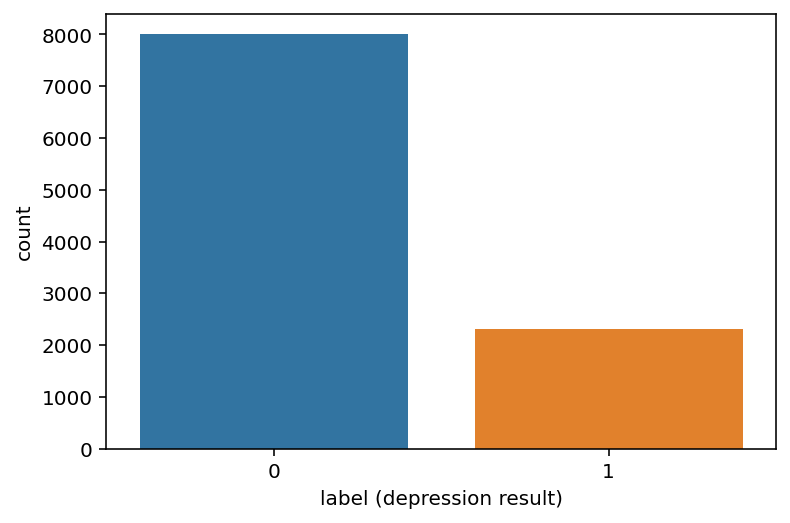

In [12]:
sns.countplot(x='label (depression result)', data=df);

#### Introducing a new column called `length`

In [13]:
df['length'] = df['message to examine'].apply(len)
df.head()

,Index,message to examine,label (depression result),length
0,106,just had a real good moment. i missssssssss hi...,0,57
1,217,is reading manga http://plurk.com/p/mzp1e,0,42
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45


In [14]:
print (f"Maximum length of a Tweet is {max(df['length'])}")

Maximum length of a Tweet is 874


In [15]:
print (f"Minimum length of a Tweet is {min(df['length'])}")

Minimum length of a Tweet is 1


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

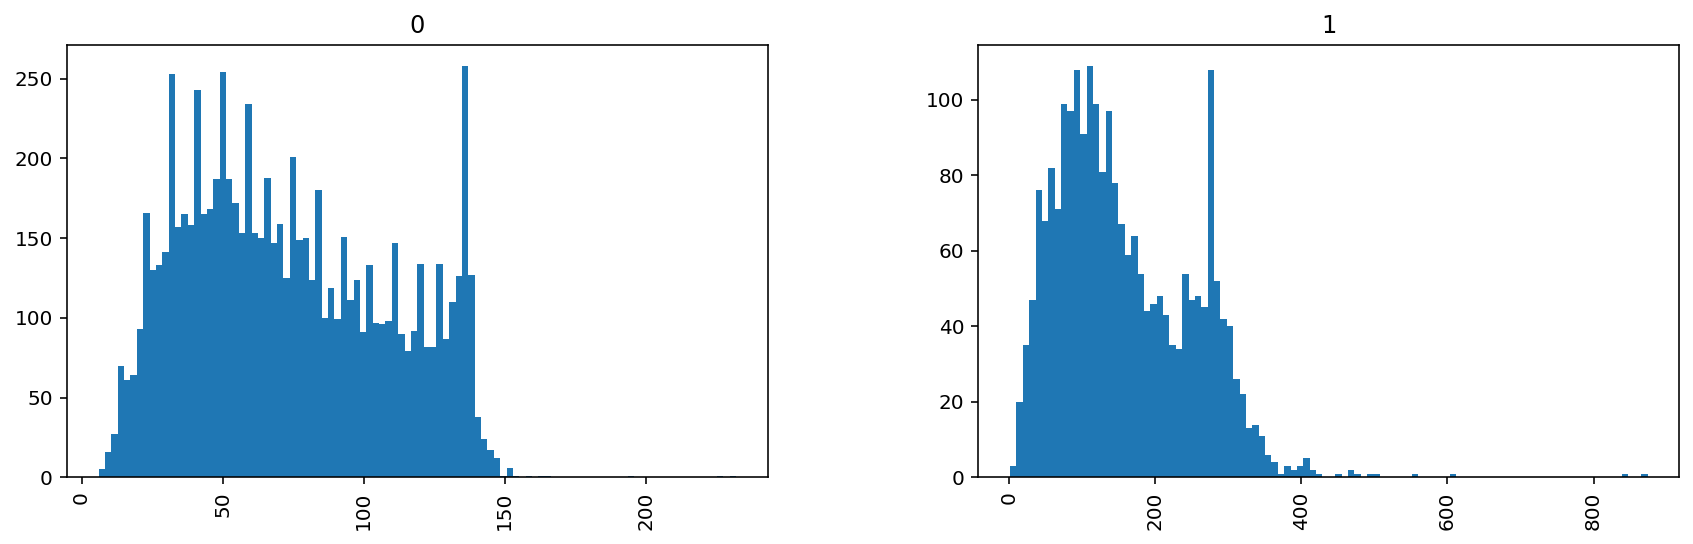

In [16]:
df.hist(column='length', by='label (depression result)', bins=100,figsize=(14,4))

### Bag of Words Approach

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message to examine'], 
                                                    df['label (depression result)'],test_size=0.20, 
                                                    random_state=1)

In [21]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)